

# Twitter Analysis




### About this project
This is your mid-semester project. You are allowed to work with a partner (if you'd like). Only one partner (or max two per group is allowed). The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. Moreoover, Trump tweets has become so consequential, they actually can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we could pick either candiadate (Hillary Clinton or Donald Trump) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret w/o any bias.


## Set up
Let us get all the libaries initialized as necessary

In [4]:
NAME = "Chaand"
COLLABORATORS = "Twitter Analysis"

In [5]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Downloading Recent Tweets
It is important to download the most recent tweets (especially if you are working as a group). Those who are working by themselves are allowed to use the downloaded files w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [6]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
import tweepy

## PART 1:  Accessing Twitter API 
In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by yourself on this project, you can skip PART 1, and complete the project using the data files provided in the data folder. PART 1 is optional for those working by themselves. However, we highly recommend that you do Part 1 (after completing the project with offline data) if you would like to "learn" how to use Twitter API that might be useful.

### Task 1.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en/apply/) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


In [7]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled
# in in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

### Task 1.2 Testing Twitter Authentication
This following code should run w/o erros or warnings and display yur twitter username. If you are working as a team, try to get a new twitter account with user names as :  student1NetId_Student2NetId (eg:  ds1089_adg133)

In [8]:
''' you can remove this comment. caz tweet api can't visit frequently, i comment this
import tweepy
from tweepy import TweepError
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Your username is:", api.auth.get_username())
except TweepError as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)
'''

' you can remove this comment. caz tweet api can\'t visit frequently, i comment this\nimport tweepy\nfrom tweepy import TweepError\nimport logging\n\ntry:\n    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])\n    auth.set_access_token(keys["access_token"], keys["access_token_secret"])\n    api = tweepy.API(auth)\n    print("Your username is:", api.auth.get_username())\nexcept TweepError as e:\n    logging.warning("There was a Tweepy error. Double check your API keys and try again.")\n    logging.warning(e)\n'

## PART 2 - Working with Twitter
The json file in data folder contains (to be downloaded by you) some loaded tweets from @RutgersU. Run it and read the code. You can also try other json files in the data folder to try this. 

In [9]:

from pathlib import Path
import json

ds_tweets_save_path = "data/2017-2018.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id="data", tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)


If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [10]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Nov 10 17:21:54 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [10, 31],
                            'text': 'HappyBirthdayMarines'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 10126672,
                                 'id_str': '10126672',
                                 'indices': [3, 8],
                                 'name': 'U.S. Marines',
                                 'screen_name': 'USMC'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'RT @USMC: #HappyBirthdayMarines!\n'
              '\n'
              'Today, we celebrate our heritage and honor the sacrifices of '
              'those who fought before us. https://t.co/1ob…',
 'geo': None,
 'id': 1193579547771453441,
 'id_str': '1193579547771453441',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'i

### Task 2.1 (Optional for Individuals)

### What you need to do. 

Re-factor the above code fragment into reusable snippets below.  You should not need to make major modifications; this is mostly an exercise in understanding the above code block. 

In [11]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "pYPrkmTNSpWN0GEDN8PHNngyR",
                "consumer_secret":  "8fcre991TBByT1ZTcUmXKwVLnab4ChKjMdT6poPy3CfNJZVVNF",
                "access_token": "1192339623684530176-sLD6sZuHkp6D9qIb73HioXAO93KjMd",
                "access_token_secret": "jJIMP4t6DW8KmyALtHg0msA1qJQ8h8e65DSjvS1sNo9yz"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    ### BEGIN SOLUTION
    
     #return re.findall('lang', path)
    #default_data.update({'item3': 3})
#     result = {}
    with open(path, "r") as f:
        d = json.load(f)
    
# #     for d in lst:
# #         print(d)
# #         result.update(d)
#     return lst
    return d




    #raise NotImplementedError()
    ### END SOLUTION

In [12]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                 "consumer_key": "pYPrkmTNSpWN0GEDN8PHNngyR",
                "consumer_secret":  "8fcre991TBByT1ZTcUmXKwVLnab4ChKjMdT6poPy3CfNJZVVNF",
                "access_token": "1192339623684530176-sLD6sZuHkp6D9qIb73HioXAO93KjMd",
                "access_token_secret": "jJIMP4t6DW8KmyALtHg0msA1qJQ8h8e65DSjvS1sNo9yz"

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    
    ### BEGIN SOLUTION
    import tweepy
    from tweepy import TweepError
    import logging

    try:
        auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
        auth.set_access_token(keys["access_token"], keys["access_token_secret"])
        api = tweepy.API(auth)
        #print("Your username is:", api.auth.get_username())
    except TweepError as e:
        logging.warning("There was a Tweepy error. Double check your API keys and try again.")
        logging.warning(e)
        
    from pathlib import Path
    import json

    #ds_tweets_save_path = "DonaldTrump_recent_tweets.json"
    # Guarding against attempts to download the data multiple
    # times:
    #if not Path(ds_tweets_save_path).is_file():
        # Getting as many recent tweets by @BerkeleyData as Twitter will let us have.
        # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
        # This was a change introduced in September 2017.

        # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
        # will use the basic Python dictionaries stored in the _json field. 
    tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id=user_account_name, 
                                                 tweet_mode='extended').items()]

        # Saving the tweets to a json file on disk for future analysi
    with open(ds_tweets_save_path, "w") as f:
            json.dump(tweets, f)


    return tweets

    
    ### END SOLUTION

In [13]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    ### BEGIN SOLUTION

    with open(path, "r") as f:
        tweets = json.load(f)
    return tweets
    
    ### END SOLUTION

In [14]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    ### BEGIN SOLUTION
    tweets_save_path = user_account_name + "_recent_tweets.json"
    keys = load_tweets(keys_path)
    tweets = download_recent_tweets_by_user(user_account_name, keys)
    if not Path(tweets_save_path).is_file():
        save_tweets(tweets, tweets_save_path)
    load_tweets(tweets_save_path)
    return tweets
    #if not Path(ds_tweets_save_path).is_file():
        
    
    
    ### END SOLUTION

If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by the realdonaldtrump. (This may take a few minutes)

In [16]:
#trump_tweets=get_tweets_with_cache("realdonaldtrump",key_file)
#print("Number of tweets downloaded:",len(trump_tweets))


### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the zip file. There should be two json files inside your data folder. One is '2017-2018.json', the other one is '2016-2017.json'. We will load the '2017-2018.json' first.

In [17]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [18]:
dest_path = 'data/2017-2018.json'
trump_tweets = load_tweets(dest_path)
pprint(trump_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Nov 10 17:21:54 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [10, 31],
                            'text': 'HappyBirthdayMarines'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 10126672,
                                 'id_str': '10126672',
                                 'indices': [3, 8],
                                 'name': 'U.S. Marines',
                                 'screen_name': 'USMC'}]},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'RT @USMC: #HappyBirthdayMarines!\n'
              '\n'
              'Today, we celebrate our heritage and honor the sacrifices of '
              'those who fought before us. https://t.co/1ob…',
 'geo': None,
 'id': 1193579547771453441,
 'id_str': '1193579547771453441',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'i

If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [19]:
assert 2000 <= len(trump_tweets) <= 4000

If the assert statement above works, then continue on to task 2.3.

### Task 2.3

Find the number of the month of the oldest tweet.

In [20]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
##oldest_month = ???

### BEGIN SOLUTION

import time
last = trump_tweets[len(trump_tweets)-1]
t = time.strptime(last['created_at'], "%a %b %d %X %z %Y")
oldest_month = t[1] 
print("Oldest_month={0}".format(oldest_month))
### END SOLUTION


Oldest_month=7


## PART 3  Twitter Source Analysis



### Task 3.1

Create a new date frame from `2016-2017.json` and merge with `trump_tweets` 

**Important:** There may/will be some overlap so be sure to eliminate duplicate tweets. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. 

**Hint:** the `id` of a tweet is always unique.

In [1]:
### BEGIN SOLUTION
dest_path = 'data/2016-2017.json'
old_trump_tweets = load_tweets(dest_path)
tweet_dict = {tweet["id"]:tweet for tweet in old_trump_tweets}
tweet_dict.update({tweet["id"]:tweet for tweet in trump_tweets})
all_tweets = list(tweet_dict.values())

all_tweets 

### END SOLUTION

assert(len(all_tweets) == 10044) 

NameError: name 'load_tweets' is not defined

### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:
 

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Warning:** *Don't forget to check the type of index*

In [22]:
### BEGIN SOLUTION
assert len(all_tweets) > len(trump_tweets)
assert len(all_tweets) > len(old_trump_tweets)
pd.to_datetime(all_tweets[0]['created_at'])
time = [pd.to_datetime(tweet['created_at']) for tweet in all_tweets]
source = [tweet['source'] for tweet in all_tweets]
text = []
for tweet in all_tweets:
    if "text" in tweet.keys():
        text.append(tweet["text"])
    else:
        text.append(tweet["full_text"])
retweet_count = [tweet['retweet_count'] for tweet in all_tweets]
index = [tweet["id"] for tweet in all_tweets]
df_trump = pd.DataFrame( 
    data = {"time": time, "source": source, "text": text, "retweet_count": retweet_count},
    index = index
)
df_trump.tail(15)
### END SOLUTION

time  \
1149345681829744647 2019-07-11 15:52:19+00:00   
1149345680189722630 2019-07-11 15:52:18+00:00   
1149345678814060545 2019-07-11 15:52:18+00:00   
1149334626311294976 2019-07-11 15:08:23+00:00   
1149330559379890176 2019-07-11 14:52:13+00:00   
1149320643818729472 2019-07-11 14:12:49+00:00   
1149318492711264257 2019-07-11 14:04:16+00:00   
1149317762843631619 2019-07-11 14:01:22+00:00   
1149317469544374272 2019-07-11 14:00:12+00:00   
1149317468730662912 2019-07-11 14:00:12+00:00   
1149289425836367872 2019-07-11 12:08:46+00:00   
1149283451415273472 2019-07-11 11:45:02+00:00   
1149283449196417026 2019-07-11 11:45:01+00:00   
1149282695064805376 2019-07-11 11:42:01+00:00   
1149282693022146561 2019-07-11 11:42:01+00:00   

                                                                                                 source  \
1149345681829744647  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149345680189722630  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149345678814060545  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149334626311294976  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149330559379890176  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149320643818729472  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149318492711264257  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149317762843631619  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149317469544374272  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149317468730662912  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149289425836367872  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149283451415273472  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149283449196417026  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149282695064805376  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1149282693022146561  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                                                                                                                                                        text  \
1149345681829744647  ...years, or maybe 10 or 14 (just kidding), they will quickly go out of business for lack of credibility, or approval, from the public. That’s why they will all be Endorsing me at some point, one way or the other. Could you imagine having Sleepy Joe Biden, or Alfred E. Newman...   
1149345680189722630         ...The Fake News is not as important, or as powerful, as Social Media. They have lost tremendous credibility since that day in November, 2016, that I came down the escalator with the person who was to become your future First Lady. When I ultimately leave office in six...   
1149345678814060545  A big subject today at the White House Social Media Summit will be the tremendous dishonesty, bias, discrimination and suppression practiced by certain companies. We will not let them get away with it much longer. The Fake News Media will also be there, but for a limited peri...   
1149334626311294976                                                                                                                                                                             So happy that I was able to keep Sikorsky Helicopter in the Great State of Pennsylvania. KEEP AMERICA GREAT!   
1149330559379890176    

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [23]:
df_trump['source'].unique()

array(['Twitter for iPhone', 'Media Studio', 'Twitter for iPad',
       'Twitter Web Client', 'Twitter Ads', 'Twitter for Android',
       'Periscope', 'TweetDeck', 'Instagram', 'Mobile Web (M5)',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>'],
      dtype=object)

## Task 3.3

Remove the HTML tags from the source field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [24]:
### BEGIN SOLUTION
df_trump['source'] =df_trump["source"].str.replace('<[^>]*>', '')
df_trump['source'].unique()

### END SOLUTION

array(['Twitter for iPhone', 'Media Studio', 'Twitter for iPad',
       'Twitter Web Client', 'Twitter Ads', 'Twitter for Android',
       'Periscope', 'TweetDeck', 'Instagram', 'Mobile Web (M5)',
       'Twitter Media Studio', 'Twitter Web App'], dtype=object)

In [25]:
from datetime import datetime
ELEC_DATE = datetime(2016, 11, 8)
INAUG_DATE = datetime(2017, 1, 20)
assert set(df_trump[(df_trump['time'] > str(ELEC_DATE)) & (df_trump['time'] < str(INAUG_DATE)) ]['source'].unique()) == set(['Twitter Ads',
 'Twitter Web Client',
 'Twitter for Android',
 'Twitter for iPhone'])

### Make a plot to find out the most common device types used in accessing twitter

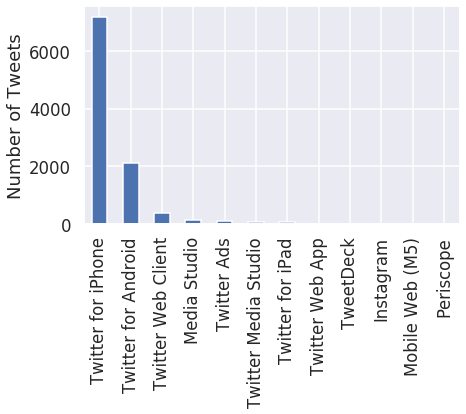

In [26]:
### BEGIN SOLUTION
df_trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")
plt.show()
### END SOLUTION

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

In [27]:
df_trump['time'][0:3]

947824196909961216   2018-01-01 13:37:52+00:00
947810806430826496   2018-01-01 12:44:40+00:00
947802588174577664   2018-01-01 12:12:00+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [28]:
import pytz
eastern = pytz.timezone('US/Eastern')

df_trump['est_time'] = df_trump['time'].dt.tz_convert(eastern)


df_trump.head()

time              source  \
947824196909961216 2018-01-01 13:37:52+00:00  Twitter for iPhone   
947810806430826496 2018-01-01 12:44:40+00:00  Twitter for iPhone   
947802588174577664 2018-01-01 12:12:00+00:00  Twitter for iPhone   
947614110082043904 2017-12-31 23:43:04+00:00  Twitter for iPhone   
947592785519173637 2017-12-31 22:18:20+00:00  Twitter for iPhone   

                                                                                                                                                                                                                                                                                                       text  \
947824196909961216                                                                                                                                                                  Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. Much work to be done, but it will be a great New Year!   
947810806430826496  Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights, the wealth of Iran is being looted. TIME FOR ...   
947802588174577664  The United States has foolishly given Pakistan more than 33 billion dollars in aid over the last 15 years, and they have given us nothing but lies &amp; deceit, thinking of our leaders as fools. They give safe haven to the terrorists we hunt in Afghanistan, with little help. ...   
947614110082043904                                                                                                                                                                                         HAPPY NEW YEAR! We are MAKING AMERICA GREAT AGAIN, and much faster than anyone thought possible!   
947592785519173637                                                      As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!   

                    retweet_count                  est_time  
947824196909961216           8237 2018-01-01 08:37:52-05:00  
947810806430826496          14595 2018-01-01 07:44:40-05:00  
947802588174577664          49566 2018-01-01 07:12:00-05:00  
947614110082043904          35164 2017-12-31 18:43:04-05:00  
947592785519173637          39428 2017-12-31 17:18:20-05:00

**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$


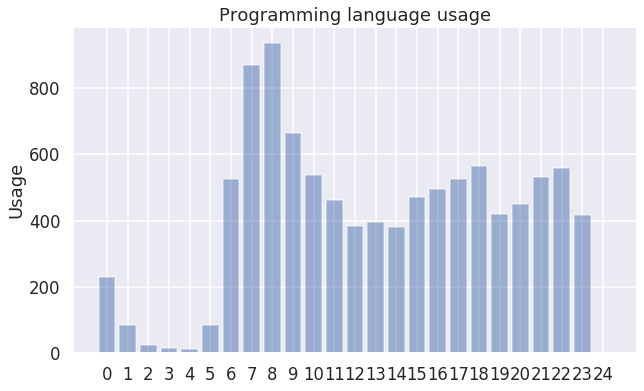

In [29]:

#df_trump['hour']=....
# make a bar plot here
### BEGIN SOLUTION

df_trump['hour'] = [est_time.hour + 
                est_time.minute/60 + 
                est_time.second/60**2 
                for est_time in df_trump['est_time']]

#df_trump.cloumns--I don't know what do you want???

x_label=[i for i in range(0,25)]
y_pos = np.arange(len(x_label))
y_label=[0 for i in range(0,25)]

for hour in df_trump['hour']:
    hour_int=int(hour)
    y_label[hour_int]=y_label[hour_int]+1
    
plt.figure(figsize=(9, 6))    
plt.bar(y_pos, y_label, align='center', alpha=0.5)
plt.xticks(y_pos, x_label)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()


### END SOLUTION

In [30]:
assert np.isclose(df_trump.loc["690171032150237184"]['hour'], 8.93639)


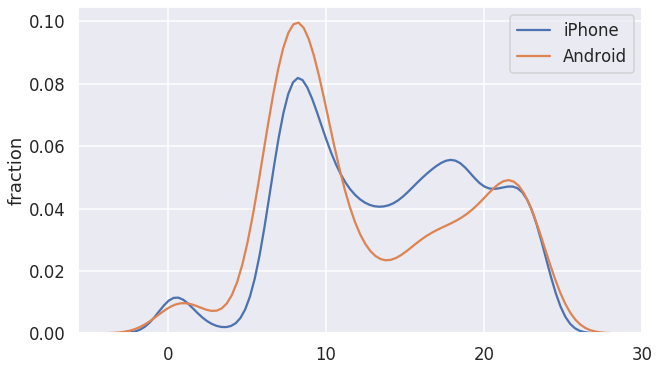

In [31]:
iphone=[]
android=[]

for ss,pp in zip(df_trump['source'],df_trump['hour']):
    if(ss=='Twitter for iPhone'):
        iphone.append(pp)
    if(ss=='Twitter for Android'):
        android.append(pp)

plt.figure(figsize=(9, 6))
sns.distplot(iphone, label = 'iPhone', hist=False)
sns.distplot(android, label = 'Android', hist=False)
plt.ylabel('fraction')
plt.xticks( [0, 10, 20, 30])
plt.legend()
plt.show()


Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 
![title](images/image1.png)


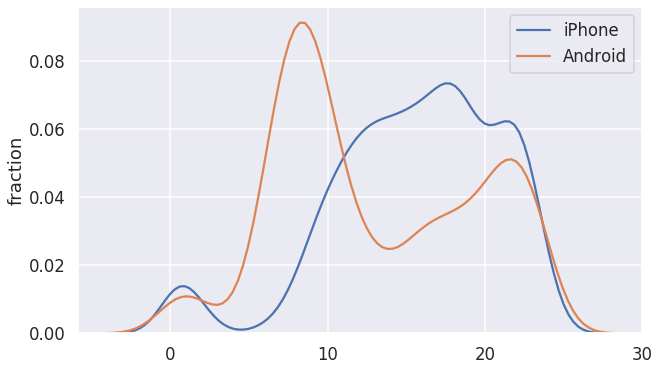

In [32]:
### BEGIN SOLUTION

df_trump['year_mine'] = [est_time.year
                for est_time in df_trump['est_time']]


iphone_16=[]
android_16=[]
for ss,pp,hh in zip(df_trump['source'],df_trump['year_mine'],df_trump['hour']):
    if(ss=='Twitter for iPhone' and pp==2016):
        iphone_16.append(hh)
    if(ss=='Twitter for Android' and pp==2016):
        android_16.append(hh)

plt.figure(figsize=(9, 6))
sns.distplot(iphone_16, label = 'iPhone', hist=False)
sns.distplot(android_16, label = 'Android', hist=False)
plt.ylabel('fraction')
plt.xticks( [0, 10, 20, 30])
plt.legend()
plt.show()

### END SOLUTION

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

![title](images/device_hour2.png)

Text(0, 0.5, 'fraction')

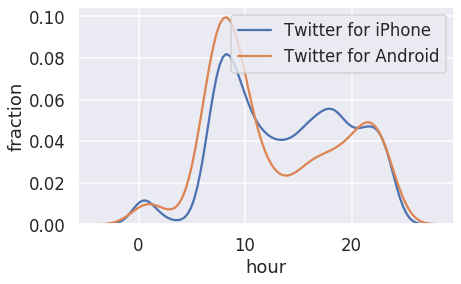

In [33]:
### BEGIN SOLUTION

plt_vals = df_trump[['hour', 'source']].set_index('source').loc[['Twitter for iPhone', 'Twitter for Android']]#.loc[(trump['source'] == ('Twitter for iPhone' or 'Twitter for Android'))]
#df.loc[df.index < '2013-10-16 08:00:00']
#x = plt_vals.groupby(['source','hour']).count()
iPhone = plt_vals.loc[plt_vals.index == 'Twitter for iPhone']
android = plt_vals.loc[plt_vals.index == 'Twitter for Android']
#x
sns.distplot(iPhone['hour'], hist = False, label = 'Twitter for iPhone')#(trump['hour'])
sns.distplot(android['hour'], hist = False, label = 'Twitter for Android')
plt.ylabel('fraction')
### END SOLUTION

### Task 3.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)

* What time of the day the Android tweets were made by paid staff?


Note that these are speculations based on what you observe in the data set.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [34]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump


Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

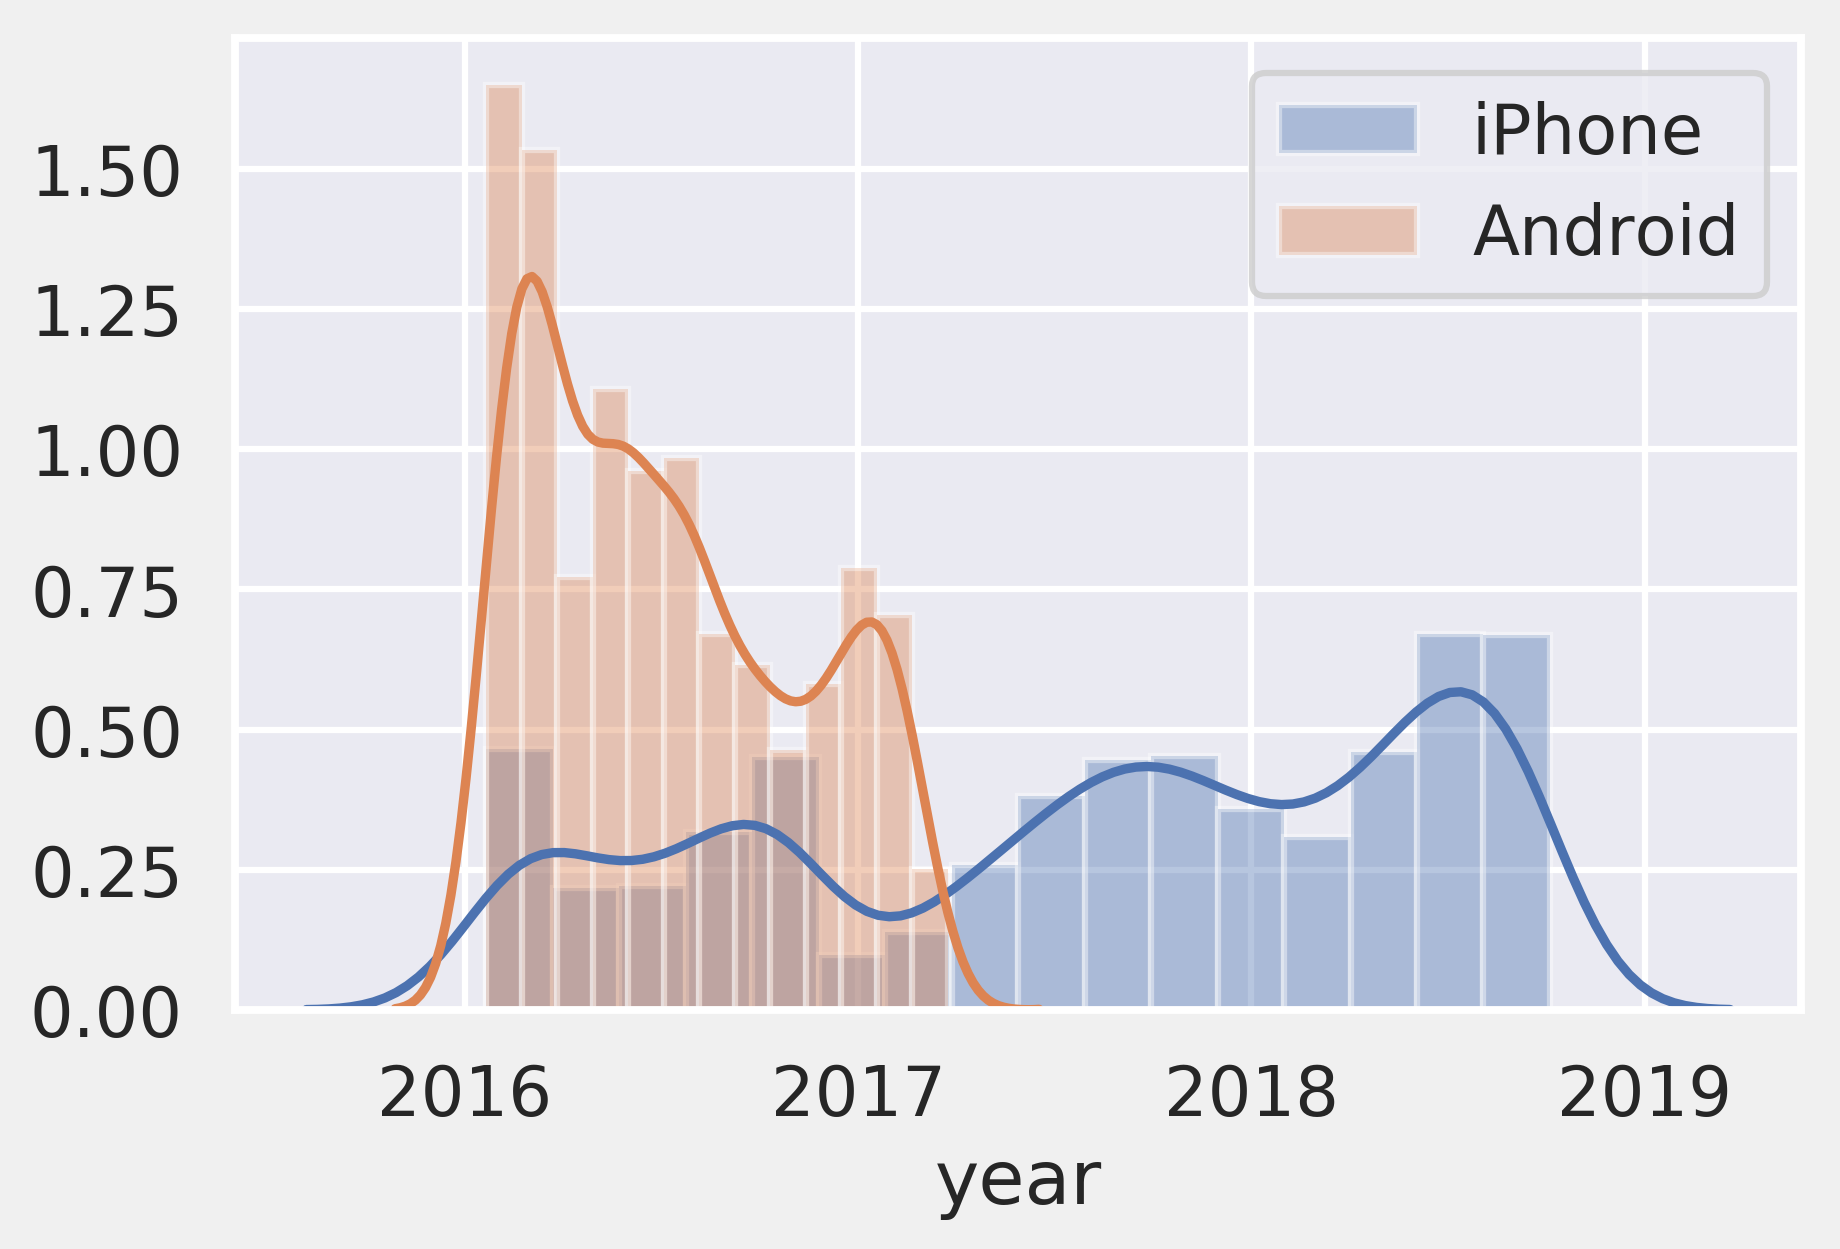

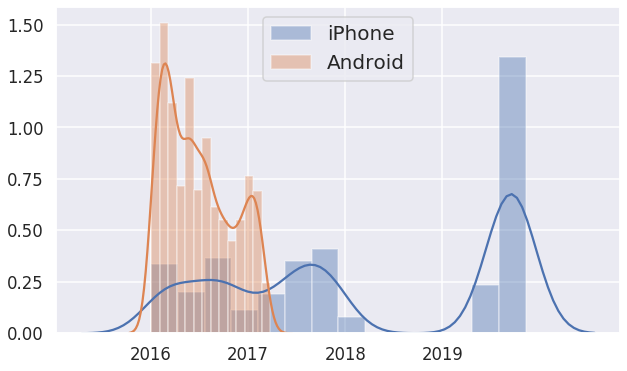

In [35]:
### BEGIN SOLUTION
plt.figure(figsize=(9, 6))

iphone_time=[]
android_time=[]
for ss,pp in zip(df_trump['source'],df_trump['time']):
    if(ss=='Twitter for iPhone'):
        iphone_time.append(pp)
    if(ss=='Twitter for Android'):
        android_time.append(pp)

sns.distplot([year_fraction(i) for i in iphone_time], label = 'iPhone');
sns.distplot([year_fraction(i) for i in android_time], label = 'Android');
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])
plt.xticks([2016, 2017, 2018, 2019])
plt.legend(prop={'size': 20});
plt.show()


### END SOLUTION

## PART 4 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [36]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [37]:
### BEGIN SOLUTION
with open('data/vader_lexicon.txt') as f:
    log = f.readlines()

line = log[0]
line
x = [line.split('\t') for line in log]
df_sent = pd.DataFrame(x).rename(columns={0: 'tokens', 1: 'polarity'}).set_index('tokens')[['polarity']]
df_sent['polarity'] = pd.to_numeric(df_sent['polarity'])

df_sent.head()
### END SOLUTION

polarity
tokens          
$:          -1.5
%)          -0.4
%-)         -1.5
&-:         -0.4
&:          -0.7

In [38]:
assert isinstance(df_sent, pd.DataFrame)
#assert df_sent.shape == (7517, 1) -- why this?


### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [39]:
### BEGIN SOLUTION

df_trump['text'] = df_trump['text'].str.lower()

### END SOLUTION

### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [40]:
# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'


### BEGIN SOLUTION
df_trump['no_punc'] =df_trump['text'].str.replace(punct_re, ' ')

### END SOLUTION

In [41]:
#what is this?
'''
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us'
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'
'''

"\nassert isinstance(punct_re, str)\nassert re.search(punct_re, 'this') is None\nassert re.search(punct_re, 'this is ok') is None\nassert re.search(punct_re, 'this is\nok') is None\nassert re.search(punct_re, 'this is not ok.') is not None\nassert re.search(punct_re, 'this#is#ok') is not None\nassert re.search(punct_re, 'this^is ok') is not None\nassert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us'\nassert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'\n"

### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

**Note that you'll get different results depending on when you pulled in the tweets.** However, you can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [42]:
tidy_format = ...

### BEGIN SOLUTION
tidy_format = df_trump['no_punc'].str.split(expand=True).stack().to_frame().reset_index(level = 1)
tidy_format.columns = ["num", "word"]
tidy_format.head()

#no_space.groupby('id')
#tidy_format

### END SOLUTION

num     word
947824196909961216    0     will
947824196909961216    1       be
947824196909961216    2  leaving
947824196909961216    3  florida
947824196909961216    4      for

In [43]:
#what is this?
'''
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'
'''

"\nassert tidy_format.loc[894661651760377856].shape == (27, 2)\nassert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'\n"

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `sent` tables and group the final answer.


In [44]:
### BEGIN SOLUTION
df_trump['polarity'] = (tidy_format.merge(df_sent, left_on = 'word', 
                                       right_index = True)['polarity']
                                        .reset_index().groupby('index').sum())
df_trump['polarity'].replace(np.float64('nan'), 0, inplace = True)

### END SOLUTION

In [45]:
#what's this?
'''
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
'''


"\nassert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)\nassert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)\nassert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)\nassert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)\nassert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)\n"

# Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [46]:
### BEGIN SOLUTION

sort_text=list(zip(df_trump['polarity'],df_trump['text']))

def sort_polarity(data):
    return data[0]

sort_text.sort(key=sort_polarity)

print('Most negative tweets:')
for t in sort_text:
    print('\n  ', t[1])

### END SOLUTION

Most negative tweets:

   the failing new york times, in one of the most devastating portrayals of bad journalism in history, got caught by a leaker that they are shifting  from their phony russian collusion narrative (the mueller report &amp; his testimony were a total disaster), to a racism witch hunt.....

   horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt. the world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!

   anthony scaramucci is a highly unstable “nut job” who was with other candidates in the primary who got shellacked, &amp; then unfortunately wheedled his way into my campaign. i barely knew him until his 11 days of gross incompetence-made a fool of himself, bad on tv. abused staff,...

   "@fiiibuster: @jeffzeleny pathetic - you have no sufficient evidence that donald trump did not suffer from voter fraud, shame! bad reporter.

   democrat jon o

   hillaryclinton can illegally get the questions to the debate &amp; delete 33,000 emails but my son don is being scorned by the fake news media?

   remember, when you hear the words "sources say" from the fake media, often times those sources are made up and do not exist.

   if chelsea clinton were asked to hold the seat for her mother,as her mother gave our country away, the fake news would say chelsea for pres!

   dow hit a new intraday all-time high! i wonder whether or not the fake news media will so report?

   tomorrow the house votes on #kateslaw &amp; no sanctuary for criminals act. lawmakers must vote to put american safety… https://t.co/p3vd8ixxad

   fake news cnn is looking at big management changes now that they got caught falsely pushing their phony russian stories. ratings way down!

   after 7 months of investigations &amp; committee hearings about my "collusion with the russians,"  nobody has been able to show any proof. sad!

   whenever you see the words 'source

➡️https://t.co/adskuuxf1b https://t.co/xhfq6zmf2h

   rt @drudge_report: rice ordered spy docs on trump? https://t.co/bl2nzrfxk9

   .@foxnews from multiple sources: "there was electronic surveillance of trump, and people close to trump. this is unprecedented." @fbi

   was the brother of john podesta paid big money to get the sanctions on russia lifted? did hillary know?

   the real story turns out to be surveillance and leaking! find the leakers.

   rt @danscavino: .@potus @realdonaldtrump signs executive orders on trade that will set the stage for revival in american manufacturing. #am…

   #confirmgorsuch #scotus https://t.co/wkqhymcya3

   where are @repmarkmeadows, @jim_jordan and @raul_labrador?
#repealandreplace #obamacare

   watch @foxandfriends now on podesta and russia!

   big announcement by ford today. major investment to be made in three michigan plants. car companies coming back to u.s.  jobs! jobs! jobs!

   the democrats will make a deal with me on healthcare as so

   just left florida for d.c. the people and spirit in that great state is unbelievable. damage horrific but will be better than ever!

   so impt rep senators, under leadership of @senatemajldr mcconnell get healthcare plan approved. after 7yrs of o'care disaster, must happen!

   thank you to prime minister of australia for telling the truth about our very civil conversation that fake news media lied about. very nice!

   "@morg25016893:  @eventbrite also, all the things rubio&amp;cruz were using for hits, just petty. trump, clearly the only one w/all the skills."

   thank you @gm, @fiatchrysler_na, @toyota, and @globlautomkrs for standing with us for better, cheaper, safer cars for americans. california has treated the auto industry very poorly for many years, harming workers and consumers. we are fixing this problem! https://t.co/cf6i1e0yjq

   as i have stated strongly before, and just to reiterate, if turkey does anything that i, in my great and unmatched wisdom, consider to be 

   wow, did you see how badly @cnn (clinton news network) is doing in the ratings. with people like @donlemon, who could expect any more?

   wow, president obama's brother, malik, just announced that he is voting for me. was probably treated badly by president-like everybody else!

   sanders says he wants to run against me because he doesn't want to run against me. he would be so easy to beat!

   mississippi! there is a very important election for governor on november 5th. i need you to get out and vote for our great republican nominee, @tatereeves. tate is strong on crime, tough on illegal immigration, and will protect your second amendment....

   mississippi, there is a very important election for governor on november 5th. i need you to get out and vote for our great republican nominee, @tatereeves. tate is strong on crime, tough on illegal immigration, and will protect your second amendment....

   mississippi, there is a very important election for governor on november 5th. i n

   i am promising you a new legacy for america. we're going to create a new american future. thank you ohio! #imwithyou https://t.co/tugccsxvoy

   hillary clinton didn't go to louisiana, and now she didn't go to mexico. she doesn't have the drive or stamina to make america great again!

   thank you to the amazing law enforcement officers today- in daytona beach, florida! #lesm #maga https://t.co/qoxjf4xzbc

   thank you to the amazing law enforcement officers in colorado!
#makeamericagreatagain #lesm https://t.co/glxtqyaqin

   thank you to our amazing law enforcement officers! #maga https://t.co/uezoroqhtw

   riley rone was a great young man. we will miss him dearly. https://t.co/r0tm44nmao

   thank you to our amazing law enforcement officers! #americafirst https://t.co/qwatt9jsqd

   "@free_sa_bd: @realdonaldtrump a vote for trump is a vote to restore our great country."

   wow- 25,000 in san diego, california!
thank you!! #trump2016 https://t.co/1nrj3zcuui

   "@richbooth6: @re

   congratulations to two great and hardworking guys, corey lewandowski and david bossie, on the success of their just out book, “let trump be trump.” finally people with real knowledge are writing about our wonderful and exciting campaign!

   yesterday, i was thrilled to be with so many wonderful friends, in utah’s magnificent capitol.

it was my honor to sign two presidential proclamations that will modify the national monuments designations of both bears ears and grand staircase escalante...
https://t.co/jithcpovci https://t.co/dipdauvorb

   we have a great team in pennsylvania! i’m proud to say that our good friends lawrence tabas &amp; bernadette “bernie” comfort will now be working together to run the @pagop. lawrence will be chairman &amp; bernie will chair my pennsylvania campaign. we must have, &amp; do, great unity in pa!

   my great friend, @repmarkmeadows, has been an excellent chairman of the house @freedomcaucus, which has been a tremendous success. i am looking forwar

In [47]:
### BEGIN SOLUTION
sort_text.sort(key=sort_polarity,reverse=True)

print('Most positive tweets:')
for t in sort_text:
    print('\n  ', t[1])

### END SOLUTION

Most positive tweets:

   i want to express my gratitude to america’s magnificent @flotus for tonight’s exquisite evening where we celebrated more than a century of loyal and devoted friendship between🇺🇸🇦🇺both of our nations are blessed by uncommon courage, unfailing commitment, and unyielding character! https://t.co/i61chczyld

   it was my great honor to deliver the keynote address at the 2019 second step presidential justice forum hosted by the 20/20 bipartisan justice center in south carolina, and my true honor to receive the bipartisan justice award, thank you! https://t.co/uf9iwni1ph

   we are all united by the same love of country, the same devotion to family, and the same profound faith that america is blessed by the eternal grace of almighty god! 

bound by these convictions, we will campaign for every vote &amp; we will win the great state of new mexico in 2020! https://t.co/bv5wxs5gxe

   will be with our two great senators, @senjohnkennedy &amp; @senbillcassidy, tonight in


   thank you to the amazing law enforcement officers today- in daytona beach, florida! #lesm #maga https://t.co/qoxjf4xzbc

   thank you to the amazing law enforcement officers in colorado!
#makeamericagreatagain #lesm https://t.co/glxtqyaqin

   thank you to our amazing law enforcement officers! #maga https://t.co/uezoroqhtw

   riley rone was a great young man. we will miss him dearly. https://t.co/r0tm44nmao

   thank you to our amazing law enforcement officers! #americafirst https://t.co/qwatt9jsqd

   "@free_sa_bd: @realdonaldtrump a vote for trump is a vote to restore our great country."

   wow- 25,000 in san diego, california!
thank you!! #trump2016 https://t.co/1nrj3zcuui

   "@richbooth6: @realdonaldtrump @cnn good interview mr. trump. you set the facts straight." thank you.

   thank you west virginia. let's keep it going. go out and vote on tuesday - we will win big. #trump2016

   rt @erictrump: wow! i am speechless! thank you to my sidekick @lynnepatton who keeps me &amp

   ....he loves our military and supports our vets! democrat jim hood will never give us his vote, is anti-trump and pro-crooked hillary. get out and vote for tate reeves on november 5th. he has my complete and total endorsement!

   young campus conservatives are flocking to turning point usa &amp; other conservative speaker events all over the country, and in record numbers. thousands of students are turning out. “i just want to compliment the president of the united states for signing that historic executive..

   rt @gopchairwoman: the economy is booming, a fantastic trade deal is waiting for a vote, yet dc democrats are only focused on their ridicul…

   ....he loves our military and supports our vets! democrat jim hood will never give us his vote, is anti-trump and pro-crooked hillary. get out and vote for tate reeves on november 5th. he has my complete &amp; total endorsement!

   will the democrats apologize after seeing what was said on the call with the ukrainian president? t

   “the democrats are trying to draw out this inquiry because they don’t have the support. donald trump is guilty only of winning the 2016 election.” @mzhemingway @foxandfriends

   censure (at least) corrupt adam schiff! after what he got caught doing, any pol who does not so vote cannot be honest....are you listening dems?

   rt @badluck_jones: free beacon reminds us of lefty double standard between brewer, pelosi finger wags https://t.co/r7c5kpzk6m

   radical left dem mayor of minneapolis, jacob frey, is doing everything possible to stifle free speech despite a record sell-out crowd at the target center. presidents clinton and obama paid almost nothing! the minneapolis police have been incredible....

   rt @cspan: president trump: "i think i'll get a nobel prize for a lot of things," https://t.co/xprfwzyyc6

   rt @sanghaviharsh: he has already made the american economy strong again. he has achieved much for the us and for the world. 

we, in india…

   i had a call today with pr

   wow, jeb bush, whose campaign is a total disaster, had to bring in mommy to take a slap at me. not nice!

   ....an attack in kabul that killed one of our great great soldiers, and 11 other people. i immediately cancelled the meeting and called off peace negotiations. what kind of people would kill so many in order to seemingly strengthen their bargaining position? they didn’t, they....

   rt @trumpwarroom: joe biden: “poor kids are just as bright and just as talented as white kids.” https://t.co/yhdsmnorce

   many reports of peaceful protests by iranian citizens fed up with regime’s corruption &amp; its squandering of the nation’s wealth to fund terrorism abroad. iranian govt should respect their people’s rights, including right to express themselves. the world is watching! #iranprotests

   dope frank bruni said i called many people, including karl rove, losers-true! i never called my friend @howardstern a loser- he’s a winner!

   so if the so-called “whistleblower” has all sec

   the approval process for the biggest tax cut &amp; tax reform package in the history of our country will soon begin. move fast congress!

   rt @columbiabugle: @realdonaldtrump @flotus president trump greeting families affected by hurricane harvey. #texasstrong https://t.co/5ga3d…

   ...didn't do it so now we have a big deal with dems holding them up (as usual) on debt ceiling approval. could have been so easy-now a mess!

   rt @ivankatrump: since @realdonaldtrump inauguration, over 1 million net new jobs have been created in the american economy! #maga

   come on republican senators, you can do it on healthcare. after 7 years, this is your chance to shine! don't let the american people down!

   republicans have a last chance to do the right thing on repeal &amp; replace after years of talking &amp; campaigning on it.

   for years, even as a "civilian," i listened as republicans pushed the repeal and replace of obamacare. now they finally have their chance!

   caught, he cried

   "@anyonetennis: @timkaine cannot believe how often the moderator interrupts #pence vs the other guy...so obvious @foxnews"  so true!

   rt @dcexaminer: exclusive: how donald trump's 30 million followers are crashing the internet https://t.co/hv2z4yrtu7 https://t.co/lwkjmdyq7q

   i will be making a major speech on illegal immigration on wednesday in the great state of arizona. big crowds, looking for a larger venue.

   rt @gatewaypundit: democrat fire marshal turns thousands of trump supporters away at columbus rally https://t.co/to8oe5cv8z via @gatewaypun…

   if cory booker is the future of the democratic party, they have no future! i know more about cory than he knows about himself.

   even the once great caesars is bankrupt in a.c. others to follow. ask the democrat city council what happened to atlantic city.

   dishonest media is trying their absolute best to depict a star in a tweet as the star of david rather than a sheriff's star, or plain star!

   the very dishonest @

   rt @danscavino: https://t.co/fk9lxttnsm

   rt @danscavino: 🚨happening now‼️
#trumpminneapolis #kag2020 https://t.co/wisfnyv3r1

   rt @ivankatrump: tune in this morning at 9am ⬇️ https://t.co/ut3kvbfimb

   rt @mariabartiromo: usmca passage, china deal should be ‘a one-two punch’: rep. tom reed https://t.co/wcbsejjir3 @morningsmaria @foxbusiness

   rt @seanhannity: maga in minnesota! https://t.co/7ktlwi9pnp

   https://t.co/si5hz81asl

   https://t.co/hzzdqy5qqv

   rt @ivankatrump: see you soon in kansas city, missouri @royblunt! https://t.co/6fw7zumxdz

   a different take! https://t.co/xknq6xtf0k

   https://t.co/i6vsodiqqp

   the hardest thing i have to do as president... https://t.co/6bzwh78i00

   sleepy joe biden! https://t.co/oztytimxqq

   crooked hillary should try it again! https://t.co/ujfipzp1fa

   rt @gop: every 2020 campaign needs to be asked: did the whistleblower communicate with you or any of your associates prior to or after the…

   rt @americanewsroom: comin

   rt @scavino45: president @realdonaldtrump with the incredible medical staff at miami valley hospital in dayton, ohio today. some extremely…

   check out what @google is up to for the 2020 election! #kag2020 https://t.co/rom2wnmusp

   the fbi, local and state law enforcement are working together in el paso and in dayton, ohio. information is rapidly being accumulated in dayton. much has already be learned in el paso. law enforcement was very rapid in both instances. updates will be given throughout the day!

   rt @pastordscott: contrary to what the left's "know nothing blacks" are saying (tamar braxton in particular) the president was involved in…

   rt @franklin_graham: 5 yrs ago today dr. kent brantly arrived at @emoryuniversity hospital after contracting the ebola virus while serving…

   https://t.co/cbw3kxwves

   ...during the talks the u.s. will start, on september 1st, putting a small additional tariff of 10% on the remaining 300 billion dollars of goods and products comi

   rt @joshrogin: pence is right. clinton &amp; obama tried to negotiate an iraq troop extension but failed. bush admin always anticipated such an…

   hillary's been failing for 30 years in not getting the job done - it will never change.

   hillary clinton failed all over the world. 
❌libya
❌syria
❌iran
❌iraq
❌asia pivot
❌russian reset
❌benghazi… https://t.co/ooakxs2rij

   the failing @nytimes, which never spoke to me, keeps saying that i am saying to advisers that i will change. false, i am who i am-never said

   no such meeting or conversation ever happened - a made up story by "low ratings" @cnn.

   statement in response to president obama's failed leadership: https://t.co/spgfifuso7

   the washington post calls out #crookedhillary for what she really is. a pathological liar! watch that nose grow! https://t.co/fsrugbyuud

   bernie sanders, who has lost most of his leverage, has totally sold out to crooked hillary clinton. he will endorse her today - fans angry!

   it was ju


   .@bobvanderplaats begged me to do an event while asking organizers for $100,000 for himself—a bad guy!

   .@majorcbs major garrett of @cbsnews covers me very inaccurately. total agenda, bad reporter!

   rt @realdonaldtrump: presidential harassment!

   presidential harassment!

   rt @marklevinshow: elizabeth warren would destroy jobs and the middle class.  if elected she must be impeached. 
https://t.co/kexzz8hyuy

   ....in new york, and another reason they are leaving. taxes and energy costs are way too high, upstate is being allowed to die as other nearby states frack &amp; drill for gold (oil) while reducing taxes &amp; creating jobs by the thousands. nyc is getting dirty &amp; unsafe again, as....

   rt @saracarterdc: democrat anger has grown so irrational that it has burst through the constitutional guardrails which protect our institut…

   why isn’t the ig investigating his so-called whistleblower? all bad info!

   rt @doranimated: we aligned under obama not with “the 

### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

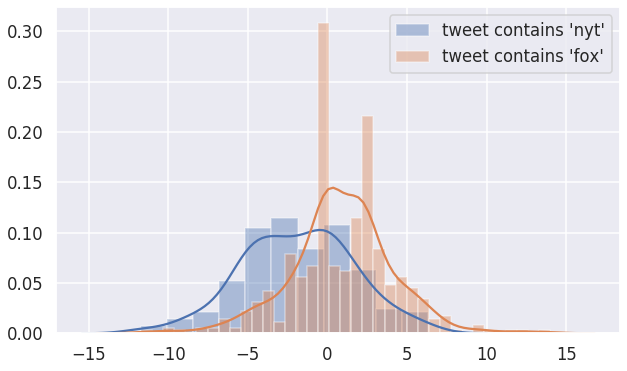

In [48]:
### BEGIN SOLUTION
plt.figure(figsize=(9, 6))

nyt=[]
fox=[]
for ss,pp in zip(df_trump['text'],df_trump['polarity']):
    if('nyt' in ss):
        nyt.append(pp)
    if('fox' in ss):
        fox.append(pp)


sns.distplot(nyt, label = "tweet contains 'nyt'")
sns.distplot(fox, label = "tweet contains 'fox'")
plt.legend()
plt.show()
### END SOLUTION

##### Comment on what you observe:

#### BEGIN SOLUTION

#### END SOLUTION

## PART 5 - Principal Component Analysis (PCA) and Twitter
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like Make America Great Again. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

In [68]:
### BEGIN SOLUTION
## code to plot the first 10 rows of the matrix
import nltk
import os
from pathlib import Path
from itertools import chain
from nltk.corpus import wordnet as wn

#if you have not nltk_data, download it
#Get your home directory
nlk_data_path = str(Path.home())
#make directory like "/home/username/nltk_data"
nlk_data_path = nlk_data_path+"/nltk_data"
if(os.path.exists(nlk_data_path)==False):
    #if doesn't exist this directory,make it.
    os.mkdir(nlk_data_path)
    #download wordnet resource.
    nltk.download("wordnet",nlk_data_path )

words=['great','thank','people','america','president','country','job','big','time','make','get','today','new',
       'news','state','many','year','american','vote','democrat','would','want','fake','tax','republican','much',
       'never','medium','one','crooked','border','good','going','day','back','like','must','win',
       'makeamericagreatagin','bad','election','obama','deal','even','join','u','love','trade','first','campaign']

import numpy
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
df_matrix=numpy.zeros(shape=(5000,50))

i=0
tokenizer = RegexpTokenizer(r'\w+')

for text_i in df_trump['text']:
    i=i+1
    if(i>5000):
        break
    tokens = tokenizer.tokenize(text_i)
    freq_list=FreqDist(tokens)
    
    for j in range(0,50):
        if(words[j] in freq_list.keys()):
            df_matrix[i][j]=freq_list[words[j]]
    
for i in range(0,10):
    print(df_matrix[i][:50])

### END SOLUTION




[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [72]:
### BEGIN SOLUTION

from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
df_matrix=scale(df_matrix)

covar_matrix=PCA(n_components=50)

covar_matrix.fit(df_matrix)
variance = covar_matrix.components_

print(variance)

### END SOLUTION

[[-3.42174109e-01 -1.55146142e-01  5.53270184e-02 ...  1.10947342e-02
  -4.38850719e-02  3.65156601e-02]
 [ 3.30533456e-01 -1.34258418e-02  5.12349115e-02 ... -2.79948132e-02
   5.76619590e-02 -3.58820007e-02]
 [ 4.17042706e-02 -1.99958146e-01  2.02153098e-01 ...  1.37524548e-01
  -8.80817642e-03 -1.92069091e-02]
 ...
 [-2.90857374e-02  5.08475668e-03 -1.50548215e-02 ...  2.60165455e-03
  -1.16918415e-03 -1.67621996e-02]
 [ 0.00000000e+00  6.09656903e-17  1.06674373e-16 ...  5.53772714e-17
  -1.33015376e-16 -1.03335749e-16]
 [ 0.00000000e+00 -1.79353324e-17 -1.31908284e-16 ...  0.00000000e+00
  -2.15105711e-16 -3.81639165e-17]]


### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

![title](images/PCAmatrix.png)



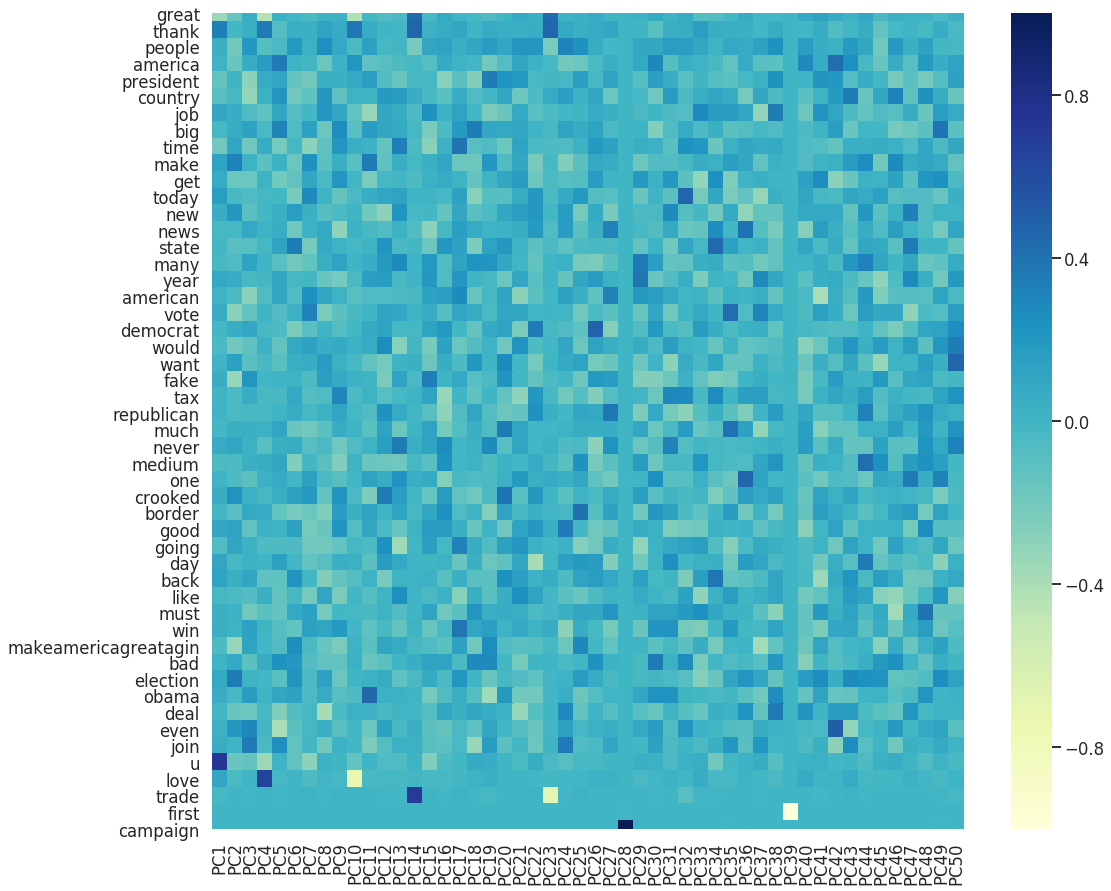

In [88]:
### BEGIN SOLUTION
f,ax = plt.subplots(figsize=(15, 15)) 
x_labels=["PC"+str(i) for i in range(1,51)]
y_pos = np.arange(len(x_label))
plt.xticks(y_pos,x_labels)
plt.yticks(y_pos,words)

heat_map = sns.heatmap(variance, cmap="YlGnBu",xticklabels=x_labels, yticklabels=words,)
'''
label_y = ax.get_yticklabels()
plt.setp(label_y , rotation = 360)
label_x = ax.get_xticklabels()
plt.setp(label_x , rotation = 90)
'''
plt.show()

### END SOLUTION

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

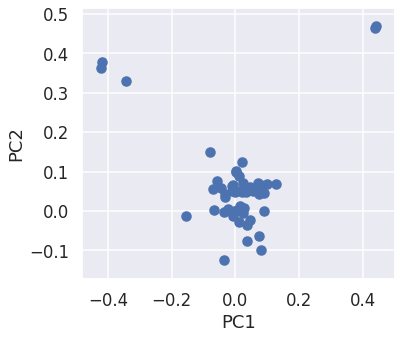

In [89]:
### BEGIN SOLUTION

plt.figure(figsize=(5, 5))    
plt.scatter(variance[0],variance[1])
plt.ylabel('PC2')
plt.xlabel('PC1')

plt.show()

### END SOLUTION

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~7 pandas commands and get everything done on one line.

In [100]:
top_20 = ...
### BEGIN SOLUTION
text_whole=""
for text_i in df_trump['text']:
    text_whole=text_whole+text_i+" "
    
tokens = tokenizer.tokenize(text_whole)
freq_list=FreqDist(tokens)
    
word_retweet_map={}

for keys in freq_list.keys():
    for text_i,retweet_count in zip(df_trump['text'],df_trump['retweet_count']):
        if(keys in text_i):
            if(keys in word_retweet_map.keys()):
                values=word_retweet_map[keys]
                values[0]=values[0]+retweet_count
                values[1]=values[1]+1
            else:
                values=[0,0]
                values[0]=retweet_count
                values[1]=1
                word_retweet_map[keys]=values
                
#sorted_word_retweet= sorted(word_retweet_map.items(), key=lambda kv: kv[0]/kv[1])

sorted_word_retweet=[]
for keys, value in word_retweet_map.items():
    if(value[0]>0):
        list=[keys]
        list.append(value[0]/value[1])
        sorted_word_retweet.append(list)

def sort_by_fre(e):
    return e[1]

sorted_word_retweet.sort(key=sort_by_fre,reverse=True)
top_20=sorted_word_retweet[:21]

top_20_dic={}


for tops in top_20:
    top_20_dic[tops[0]]=tops[1]

top_20_dataframe=pd.DataFrame.from_dict(top_20_dic,orient='index',columns=['retweet_count'])
top_20_dataframe.index.name = 'word'
top_20_dataframe.head()



### END SOLUTION

retweet_count
word                        
wyunhjjujg          369530.0
fraudnewscnn        200188.5
kanyewest           199880.0
incarceration       199880.0
823                 168765.0

### Task 6.2
Plot a bar chart of your results:

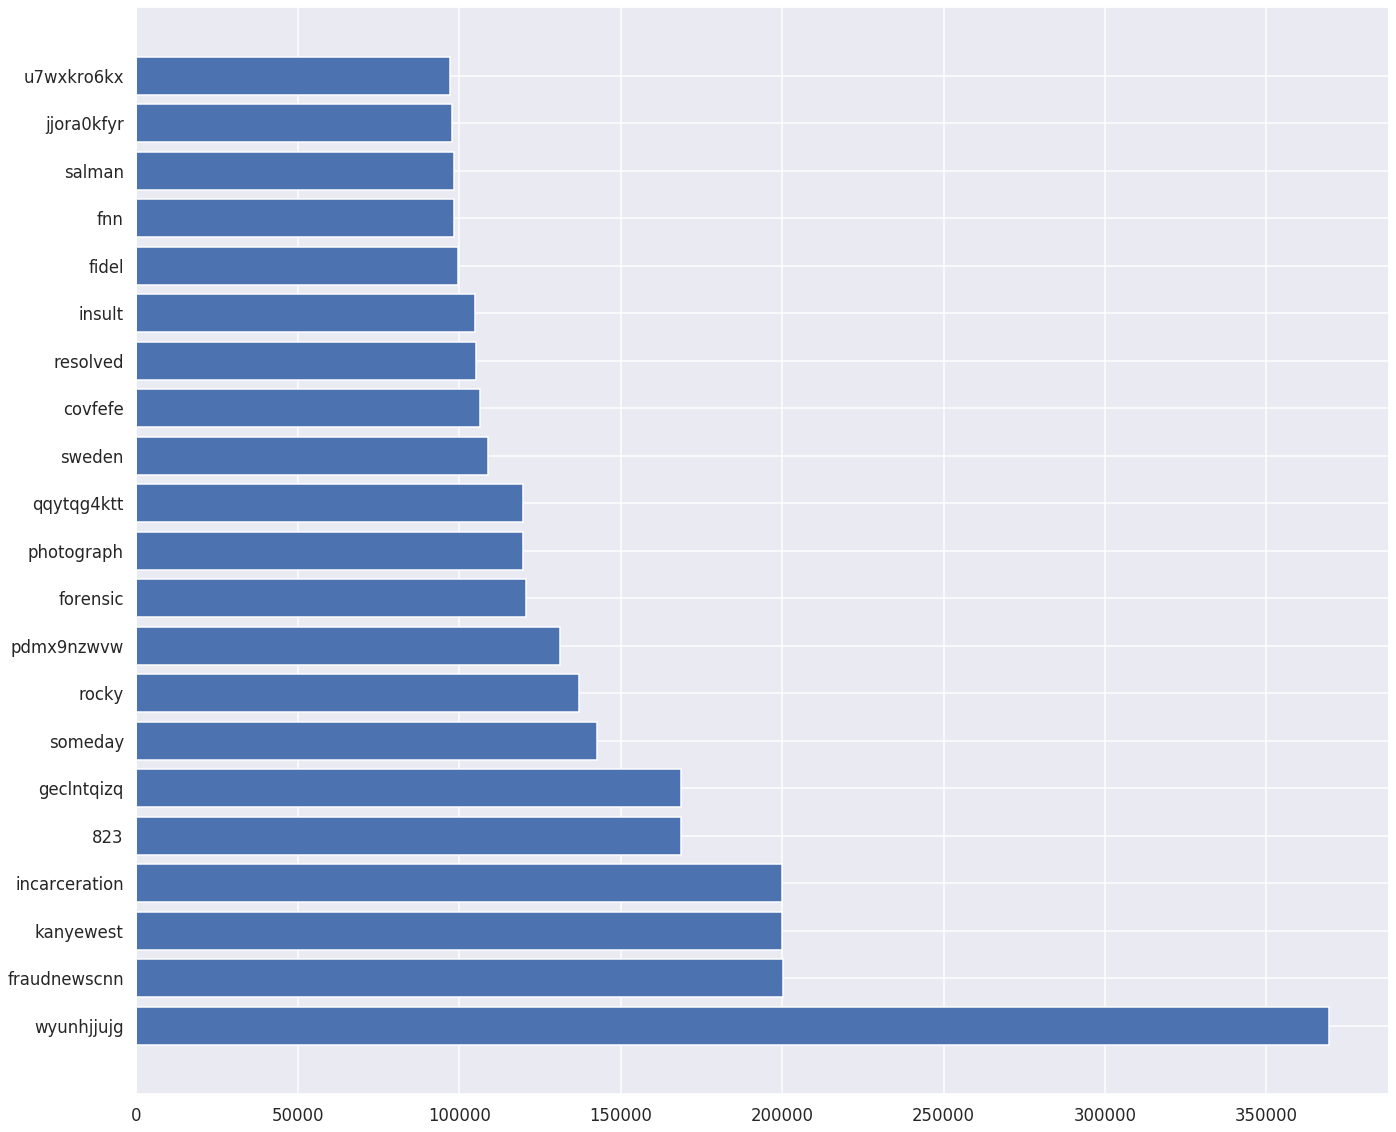

In [112]:
### BEGIN SOLUTION

x_label=[values for key,values in top_20_dic.items()]
y_pos = np.arange(len(x_label))
y_label=[key for key,values in top_20_dic.items()]

   
plt.figure(figsize=(20, 20))    
plt.barh(y_pos, x_label)
plt.yticks(y_pos, y_label)


plt.show()
### END SOLUTION